## BASC Language partition

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio
from nilearn import plotting, image
from nilearn.image.image import mean_img
from nilearn.plotting.img_plotting import plot_epi, plot_roi
import numpy as np

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

In [5]:
##parameter
#scales
scale = 7
#load basc map
in_vol=nib.load('/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/basc_LANGUAGE_rl-lr_niak-fix-scrub_900R/stability_group_nii/sci10_scg7_scf6/brain_partition_consensus_group_sci10_scg7_scf6.nii.gz')


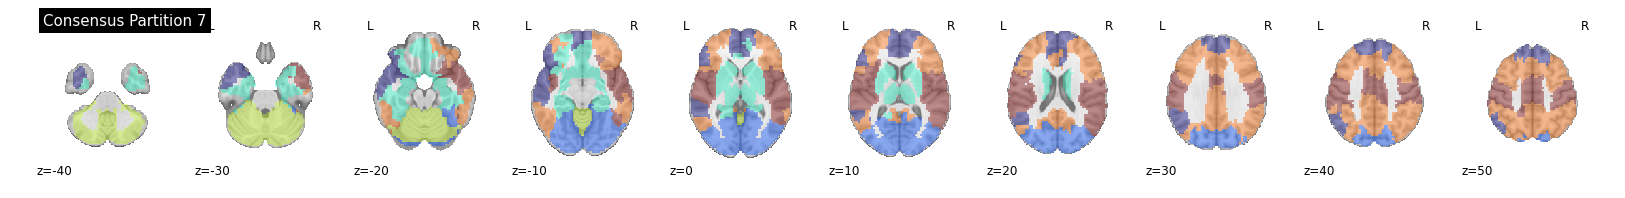

In [6]:
## Display partitions
display = plotting.plot_anat('/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/white_template.nii.gz',
                             colorbar=False,
                             title="Consensus Partition %i"%(scale),
                             display_mode='z',
                             cut_coords= range(-40, 60, 10) 
                             )


display.add_overlay(in_vol,cmap=cmx.jet,alpha=0.4)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0


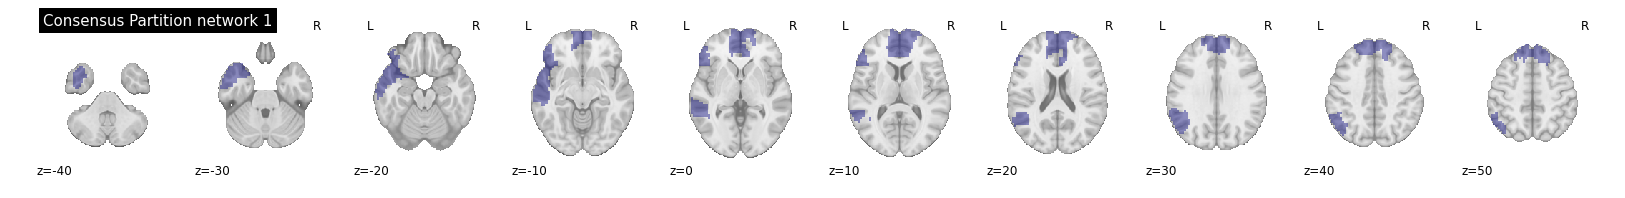

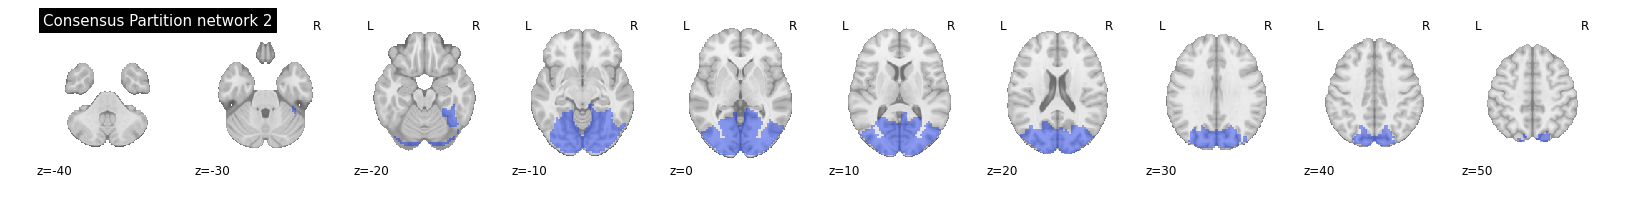

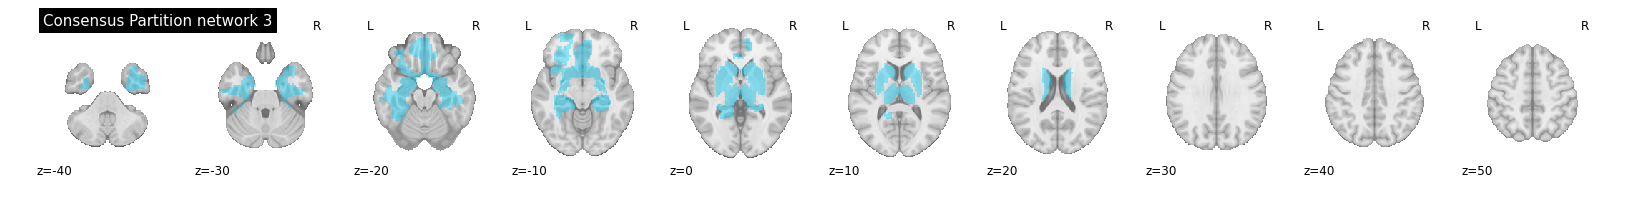

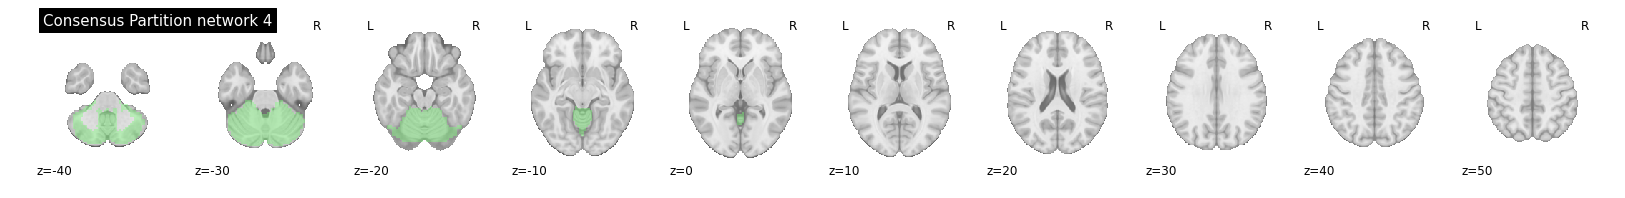

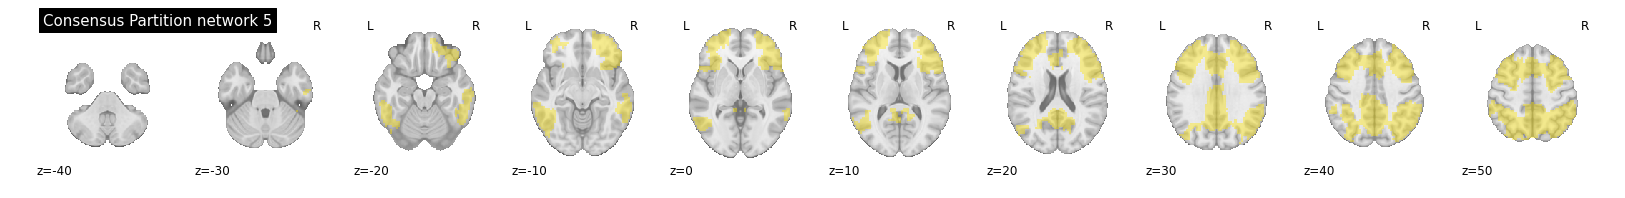

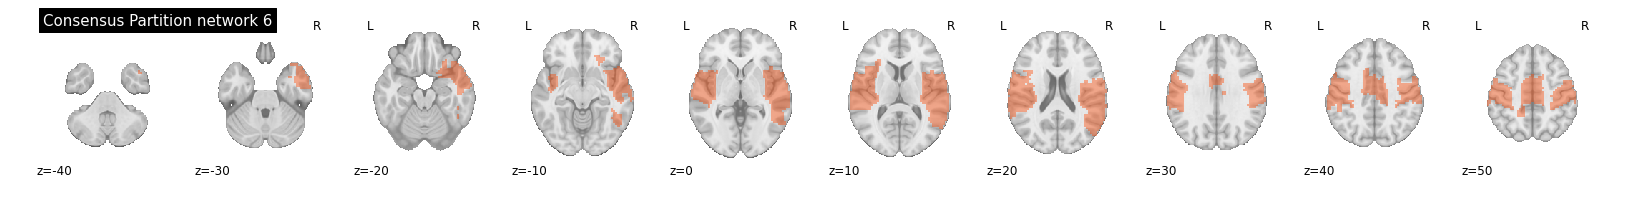

In [7]:
##display slected network
network = 6
data=in_vol.get_data()
value=np.unique(data[data!=0]) 
new_shape = data.shape + (np.max(value),)
output= np.zeros(new_shape)
for ind, val in enumerate(value):
    output[data==val,ind] = val
out_image = nib.Nifti1Image(output, affine=in_vol.get_affine(), header=in_vol.get_header())
for idx in range(network):
    display = plotting.plot_anat('/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/white_template.nii.gz',
                                 colorbar=False,
                                 title="Consensus Partition network %i"%(idx+1),
                                 display_mode='z',
                                 cut_coords= range(-40, 60, 10) )

    display.add_overlay(image.index_img(out_image, idx ),cmap=cmx.jet,alpha=0.4, vmin=1, vmax=scale)